In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg

%matplotlib inline 
%reload_ext autoreload 
%autoreload 2

In [7]:
# import data 

#Please note: the experiment had to be repeated several times, therefore has_website has most likely been wrongly set
# Instead use: har_file

db = psycopg.connect(dbname='complexity_analysis')
cursor = db.cursor()
#res = cursor.execute("SELECT dns, number_queried_servers  FROM websites ORDER BY number_queried_servers DESC LIMIT 50")
#print(cursor.fetchall())

# import data 
website_df = pd.read_sql_query("SELECT * FROM websites", db)
mime_types_df = pd.read_sql_query("SELECT * FROM mime_types", db)

cursor.execute("SELECT COUNT(*) FROM websites")
domains_count = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM websites WHERE har_file=True")
website_count = cursor.fetchone()[0]
#website_count = 719281

cursor.execute("SELECT COUNT(*) FROM websites WHERE har_file=True AND has_error=True")
error_pages = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM websites WHERE has_error=True AND has_website=False")
display_error = cursor.fetchone()[0]



print('domains offering a website ', website_count, '/', domains_count)
print('error encounter, no page provided ', domains_count-website_count, '/', domains_count)
print('domains displaying an error page ', error_pages, '/', domains_count)



#TODO error falsch gesetzt? immer auf False wenn einer da?

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4608/232824818.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  website_df = pd.read_sql_query("SELECT * FROM websites", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4608/232824818.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mime_types_df = pd.read_sql_query("SELECT * FROM mime_types", db)


domains offerinng a website  719281 / 1000000
error encounter, no page provided  280719 / 1000000
domains displaying an error page  718274 / 1000000


In [ ]:
# website complexity statisitics
median_objects = website_df['number_objects_loaded'].median()
mean_objects = website_df['number_objects_loaded'].mean()

median_queried_servers = website_df['number_queried_servers'].median()
mean_queried_servers = website_df['number_queried_servers'].mean()

median_non_origin_servers = website_df['number_non_origin_servers'].median()
mean_non_origin_servers = website_df['number_non_origin_servers'].mean()

median_mime_types = website_df['number_mime_types'].median()
mean_mime_types = website_df['number_mime_types'].mean()

median_bytes_downladed = website_df['bytes_downladed'].median().div(1024).div(1024)
mean_bytes_downladed = website_df['bytes_downladed'].mean().div(1024).div(1024)


print('median number of objects ', median_objects)
print('mean number of objects ', mean_objects)
print('median queried servers ', median_queried_servers)
print('mean queried servers ', mean_queried_servers)
print('median non origin servers ', median_non_origin_servers)
print('mean non origin servers ', mean_non_origin_servers)
print('median number of mime types ', median_mime_types)
print('mean number of mime types ', mean_mime_types)
print('median bytes downloaded ', median_bytes_downladed, ' MB')
print('mean bytes downloaded ', mean_bytes_downladed, ' MB')


In [ ]:
# correletion between website properties and DoE impact on loading time
website_df['doe_penalty'] = #TODO
correlation_doe = website_df.corr()['doe_penalty']

In [8]:
website_df

,_id,has_website,has_error,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,har_file
0,115793,False,True,civo.com,None,0.0,0.0,0.0,0.0,0.0,True
1,840287,False,True,zennichi.net,None,0.0,0.0,0.0,0.0,0.0,True
2,2613,False,True,pubnub.com,None,0.0,0.0,0.0,0.0,0.0,True
3,552448,False,True,skm.com.ua,None,0.0,0.0,0.0,0.0,0.0,True
4,561809,False,True,veridicium.com,None,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
999995,898305,False,True,i21st.cn,None,0.0,0.0,0.0,0.0,0.0,True
999996,731437,False,True,benotto.com,None,0.0,0.0,0.0,0.0,0.0,True
999997,131254,False,True,citytv.com,None,0.0,0.0,0.0,0.0,0.0,True
999998,726646,False,True,moutfitters.com,None,0.0,0.0,0.0,0.0,0.0,True


In [9]:
mime_types_df

,website_id,mime_type,occurences,bytes_body_download,bytes_header_download


([<matplotlib.patches.Wedge at 0x7fb92e708c10>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'websites'),
  Text(0.7778174593052022, -0.7778174593052025, 'non website domains')])

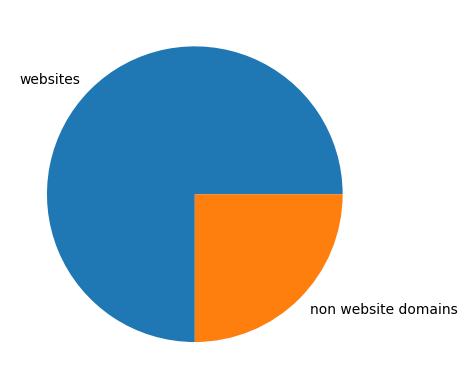

In [9]:
sample = len(website_df['number_objects_loaded'])
not_a_website = website_df['number_objects_loaded'].isna().sum()

plt.pie([sample-not_a_website, not_a_website], labels=['websites', 'non website domains']) 

In [16]:
website_df = website_df[website_df['number_objects_loaded'].notna()]
website_df['number_objects_loaded'].isna().sum()

0

In [18]:
# calculate in kb
website_df['bytes_downladed'] = website_df['bytes_downladed'].div(1000).round()

In [20]:
website_df

,_id,dns,number_dns_queries,number_objects_loaded,number_queried_servers,number_non_origin_servers,number_mime_types,bytes_downladed,alexa_category
0,1,google.com,None,34.0,8.0,4.0,13.0,1054.0,None
2,3,microsoft.com,None,94.0,16.0,8.0,22.0,3634.0,None
3,4,facebook.com,None,69.0,6.0,4.0,10.0,2659.0,None
5,6,googleapis.com,None,4.0,2.0,1.0,2.0,18.0,None
6,7,apple.com,None,62.0,5.0,2.0,16.0,9552.0,None
...,...,...,...,...,...,...,...,...,...
493,494,ft.com,None,143.0,19.0,11.0,19.0,1915.0,None
496,497,virtualearth.net,None,104.0,6.0,3.0,12.0,1532.0,None
497,498,trustpilot.com,None,141.0,16.0,13.0,19.0,2554.0,None
498,499,visualstudio.com,None,223.0,19.0,17.0,21.0,4909.0,None


[Text(0.5, 0, 'bytes downloaded in kB'), Text(0, 0.5, 'number of websites')]

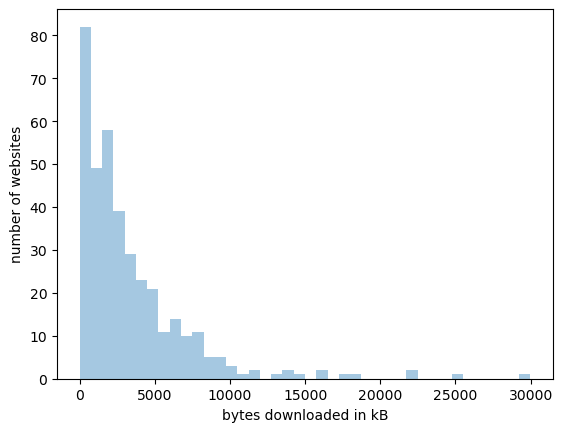

In [22]:
# number of bytes downloaded
diagram = sns.distplot(website_df['bytes_downladed'], kde=False, bins=40)
diagram.set(xlabel='bytes downloaded in kB', ylabel='number of websites')


[Text(0.5, 0, 'number of mime_types'), Text(0, 0.5, 'number of websites')]

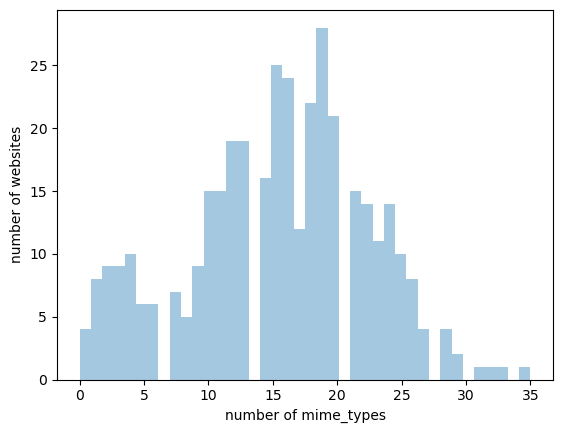

In [23]:
# number of bytes downloaded
diagram = sns.distplot(website_df['number_mime_types'], kde=False, bins=40)
diagram.set(xlabel='number of mime_types', ylabel='number of websites')

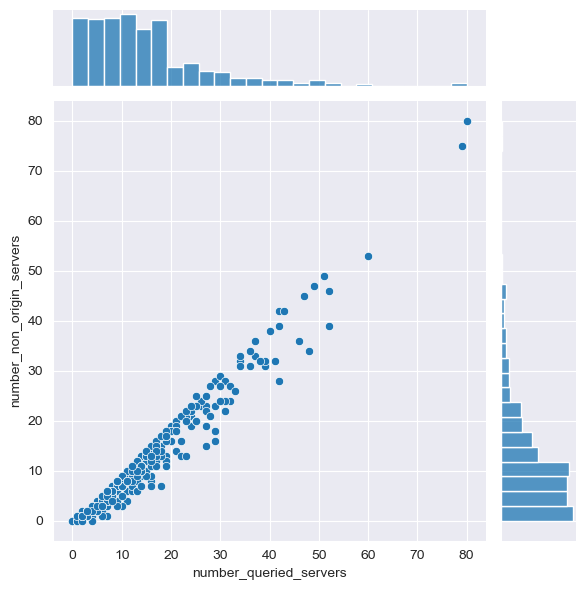

In [29]:
# queried servers compared to non origin servers
sns.set_style('darkgrid')
sns.jointplot(x='number_queried_servers', y='number_non_origin_servers', data=website_df)


In [42]:
google = mime_types_df.loc[mime_types_df['website_id'] == 1]

microsoft = mime_types_df.loc[mime_types_df['website_id'] == 3]

facebook = mime_types_df.loc[mime_types_df['website_id'] == 4]

apple = mime_types_df.loc[mime_types_df['website_id'] == 7]


<AxesSubplot:xlabel='occurences', ylabel='mime_type'>

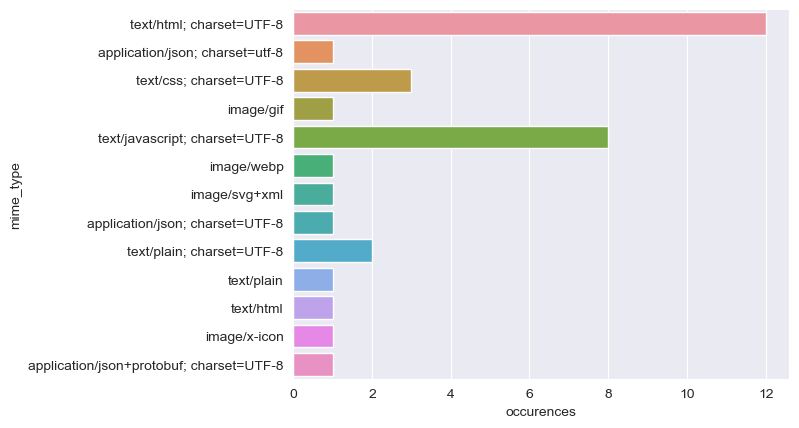

In [43]:
sns.barplot(data=google, x="occurences", y="mime_type")

<AxesSubplot:xlabel='occurences', ylabel='mime_type'>

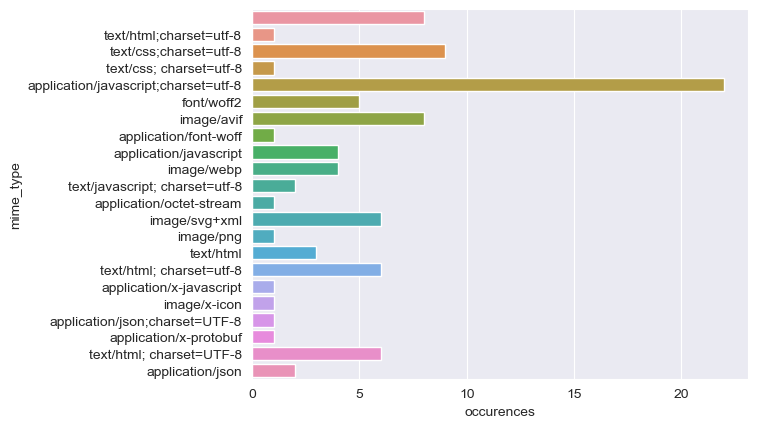

In [44]:
sns.barplot(data=microsoft, x="occurences", y="mime_type")

<AxesSubplot:xlabel='occurences', ylabel='mime_type'>

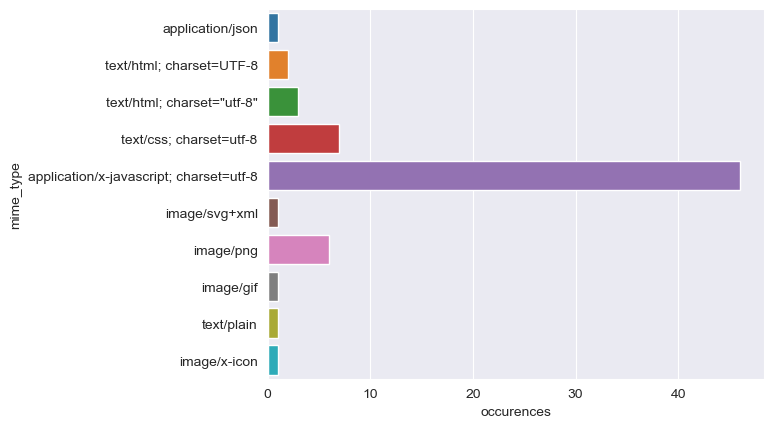

In [45]:
sns.barplot(data=facebook, x="occurences", y="mime_type")

<AxesSubplot:xlabel='occurences', ylabel='mime_type'>

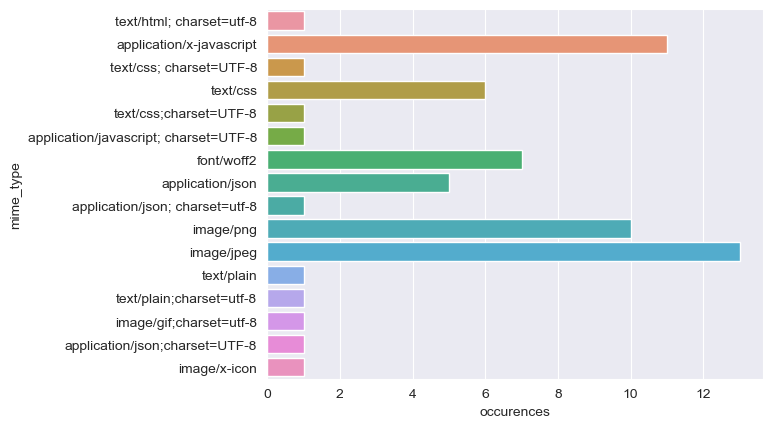

In [46]:
sns.barplot(data=apple, x="occurences", y="mime_type")

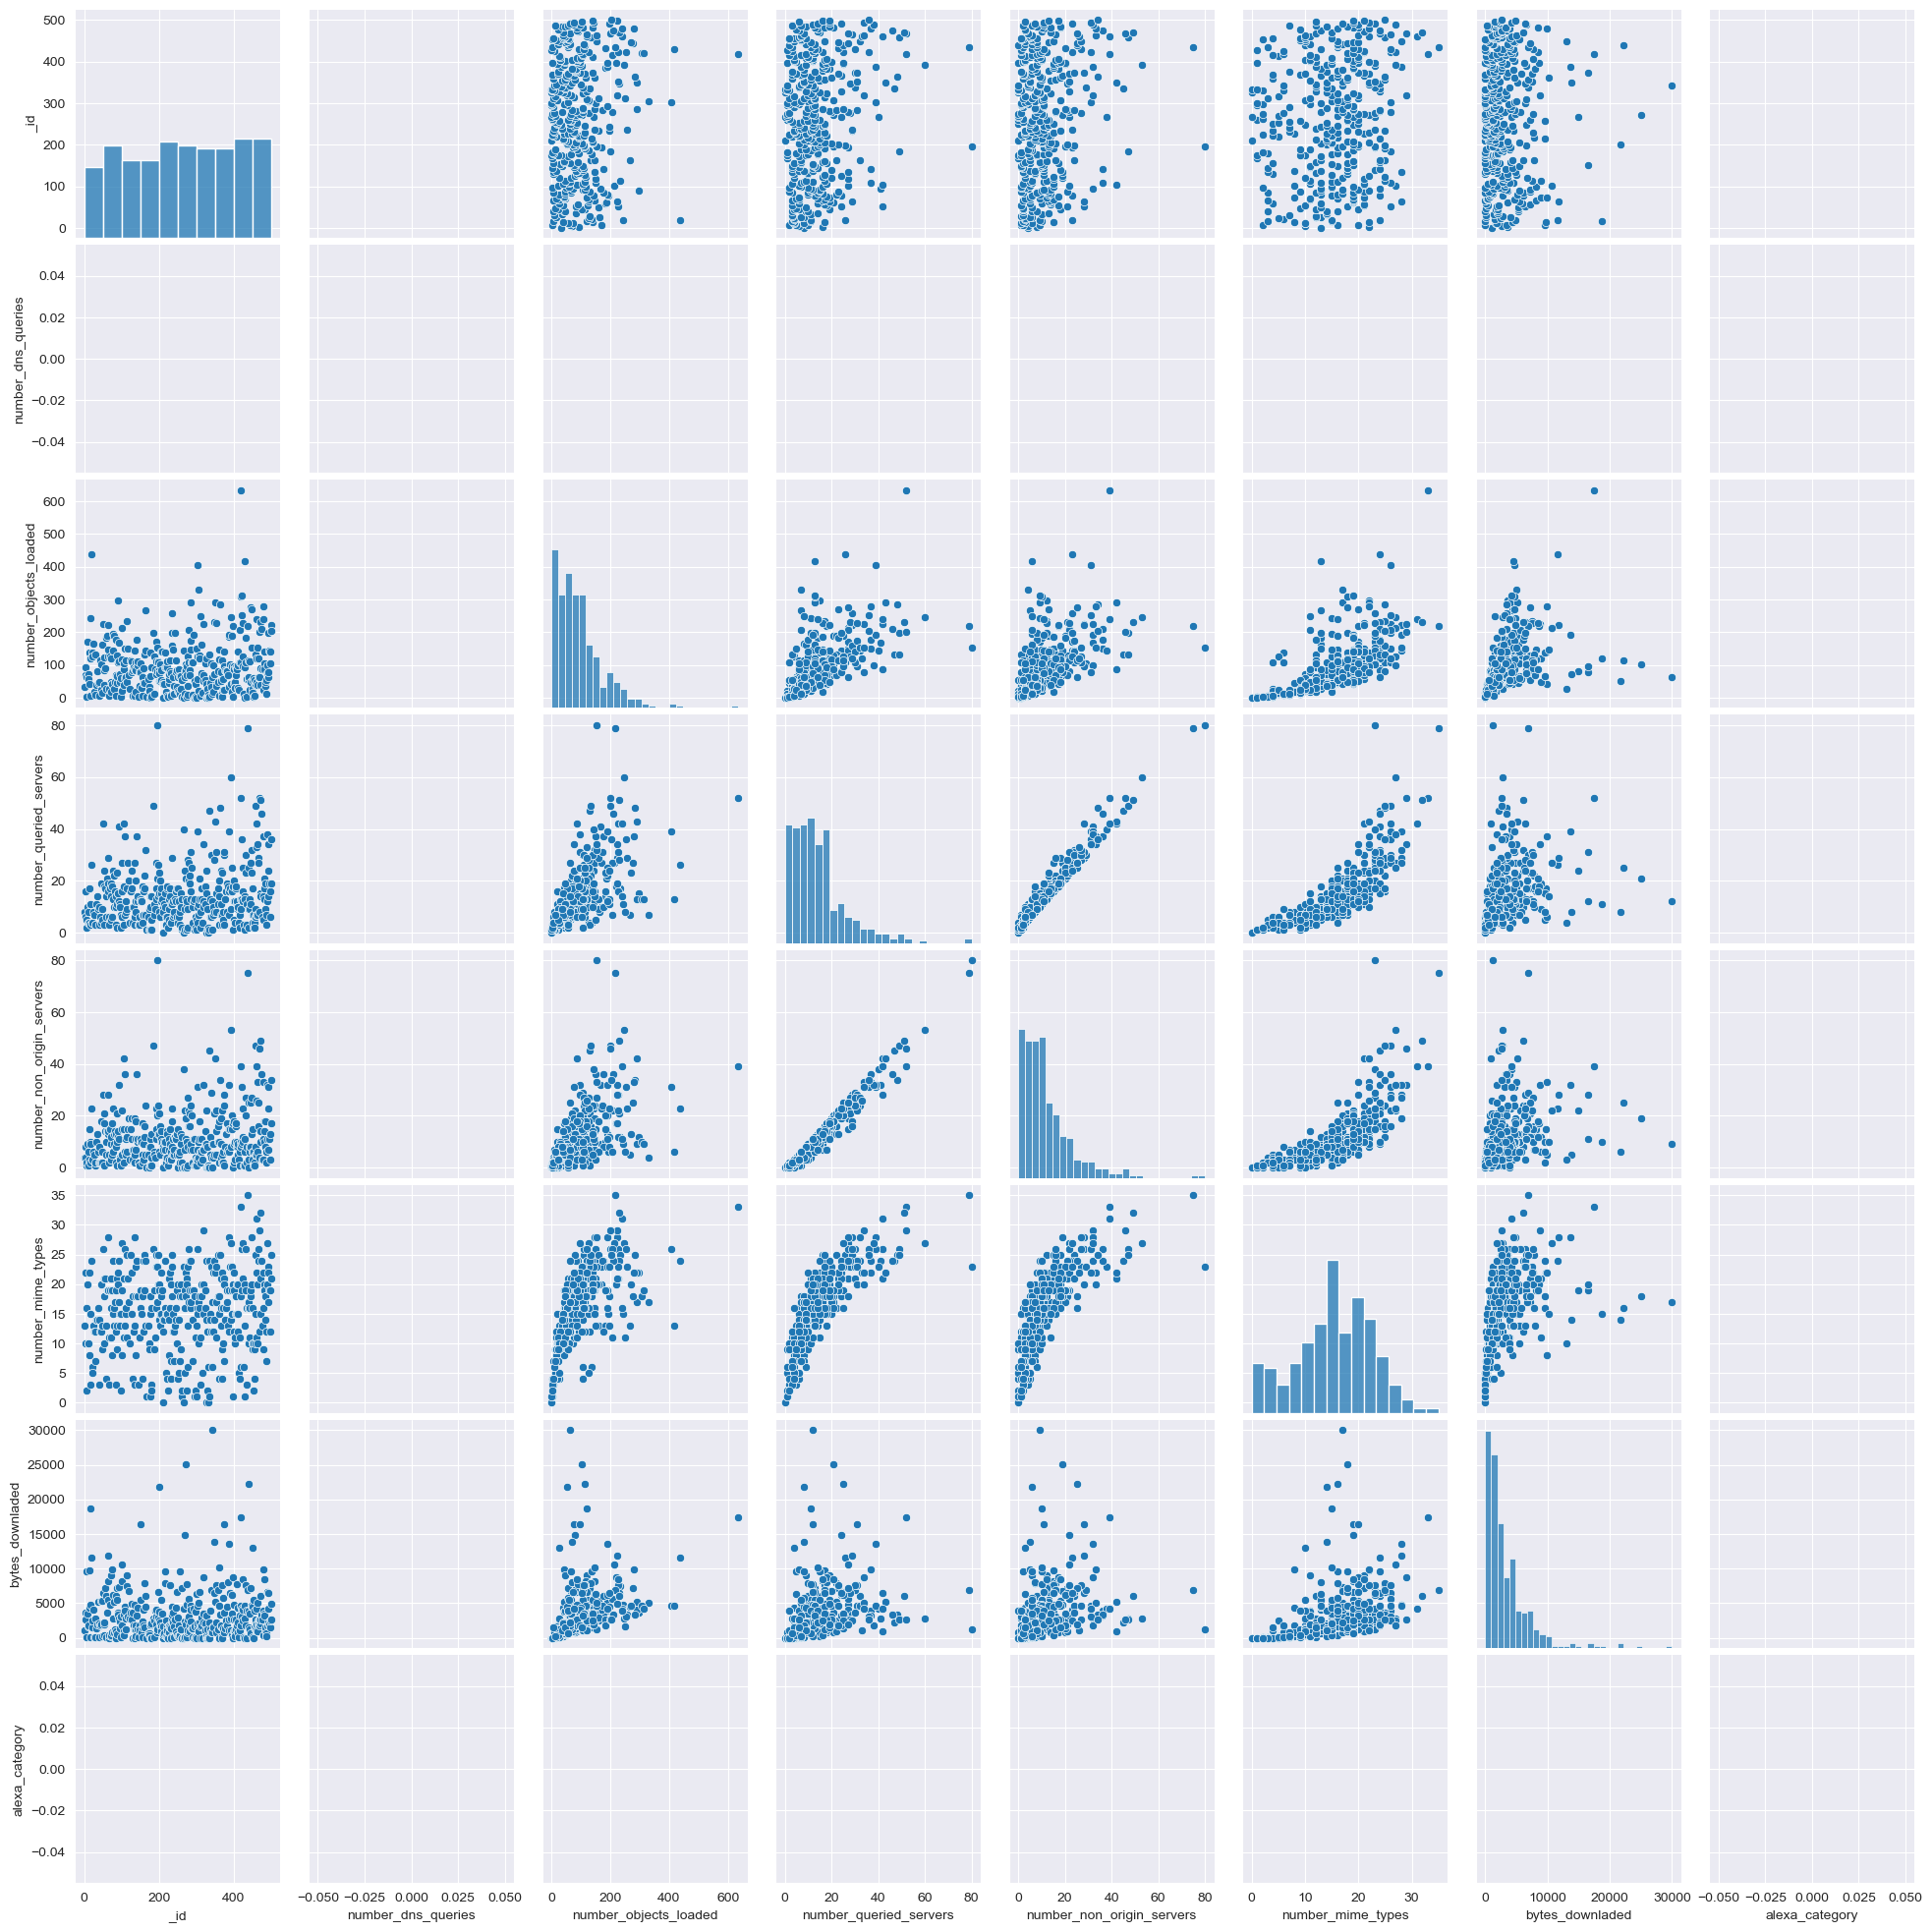

In [47]:
sns.pairplot(website_df, palette='Blues')